# Analyzing Web Logs of Web Dev and Data Science Curriculum
Using Time Series Analysis to Determine 
- Anomalies in User Curriculumn Access
- General Trends in User Curriculumn Access

### Table of Contents
- [Which lesson appears to attract the most traffic consistently across cohorts (per program)?](#first-bullet)
- [Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?](#second-bullet)
- [Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?](#third-bullet)
- [Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents?](#fourth-bullet)
- [At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?](#fifth-bullet)
- [What topics are grads continuing to reference after graduation and into their jobs (for each program)?](#sixth-bullet)
- [Which lessons are least accessed?](#seventh-bullet)

### Reference for Cohort Id's
| cohort_id | name       | start_date | end_date   | program_id |
|-----------|------------|------------|------------|------------|
| 1         | Arches     | 2014-02-04 | 2014-04-22 | 1          |
| 2         | Badlands   | 2014-06-04 | 2014-08-22 | 1          |
| 3         | Carlsbad   | 2014-09-04 | 2014-11-05 | 1          |
| 4         | Denali     | 2014-10-20 | 2015-01-18 | 1          |
| 5         | Everglades | 2014-11-18 | 2015-02-24 | 1          |
| 6         | Franklin   | 2015-02-03 | 2015-05-26 | 1          |
| 7         | Glacier    | 2015-06-05 | 2015-10-06 | 1          |
| 8         | Hampton    | 2015-09-22 | 2016-02-06 | 1          |
| 9         | Apollo     | 2015-03-30 | 2015-07-29 | 4          |
| 10        | Balboa     | 2015-11-03 | 2016-03-11 | 4          |
| 11        | Ike        | 2016-01-20 | 2016-05-12 | 1          |
| 12        | Joshua     | 2016-03-08 | 2016-06-30 | 1          |
| 13        | Kings      | 2016-05-23 | 2016-09-15 | 1          |
| 14        | Lassen     | 2016-07-18 | 2016-11-10 | 1          |
| 15        | Mammoth    | 2016-09-26 | 2017-02-02 | 2          |
| 16        | Niagara    | 2016-10-26 | 2017-03-09 | 2          |
| 17        | Olympic    | 2017-02-06 | 2017-05-25 | 1          |
| 18        | Pinnacles  | 2017-03-27 | 2017-07-20 | 2          |
| 19        | Quincy     | 2017-06-05 | 2017-09-22 | 1          |
| 20        | Redwood    | 2017-07-31 | 2017-12-06 | 2          |
| 21        | Sequoia    | 2017-09-27 | 2018-02-15 | 2          |
| 22        | Teddy      | 2018-01-08 | 2018-05-17 | 2          |
| 23        | Ulysses    | 2018-03-05 | 2018-07-19 | 2          |
| 24        | Voyageurs  | 2018-05-29 | 2018-10-11 | 2          |
| 25        | Wrangell   | 2018-07-23 | 2018-11-29 | 2          |
| 26        | Xanadu     | 2018-09-17 | 2019-02-08 | 2          |
| 27        | Yosemite   | 2018-11-05 | 2019-04-03 | 2          |
| 28        | Staff      | 2014-02-04 | 2014-02-04 | 2          |
| 29        | Zion       | 2019-01-22 | 2019-06-04 | 2          |
| 30        | Ada        | 2019-02-04 | 2019-06-16 | 3          |
| 31        | Andromeda  | 2019-03-18 | 2019-07-30 | 2          |
| 32        | Betelgeuse | 2019-05-28 | 2019-10-08 | 2          |
| 33        | Ceres      | 2019-07-15 | 2019-12-11 | 2          |
| 34        | Bayes      | 2019-08-19 | 2020-01-30 | 3          |
| 51        | Deimos     | 2019-09-16 | 2020-02-27 | 2          |
| 52        | Europa     | 2019-11-04 | 2020-04-17 | 2          |
| 53        | Fortuna    | 2020-01-13 | 2020-06-23 | 2          |
| 55        | Curie      | 2020-02-03 | 2020-07-07 | 3          |
| 56        | Apex       | 2020-02-24 | 2020-07-29 | 2          |
| 57        | Ganymede   | 2020-03-23 | 2020-08-20 | 2          |
| 58        | Hyperion   | 2020-05-26 | 2020-11-10 | 2          |
| 59        | Darden     | 2020-07-13 | 2021-01-12 | 3          |
| 60        | Io         | 2020-07-20 | 2021-01-21 | 2          |
| 61        | Bash       | 2020-07-20 | 2021-01-21 | 2          |
| 62        | Jupiter    | 2020-09-21 | 2021-03-30 | 2          |
| 132       | Kalypso    | 2020-11-02 | 2021-05-04 | 2          |
| 0         | Unknown    |            |            |            |

# Data Acquired with Wrangle.py Module
- will need the txt file downloaded in working directory
    - anonymized-curriculum-access.txt
- reads txt file, renames columns, sets date to index, and returns the cleaned df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import Wrangle

In [2]:
df = Wrangle.acquire_logs()

In [3]:
# creating a dataframe of only Data Science Cohorts, any cohort with program id of 3
DS_df = df[(df.cohort_id == 30) | (df.cohort_id == 34) | (df.cohort_id == 55) | (df.cohort_id == 59)]

In [4]:
# filtering out pages that are not curriculum
DS_df = DS_df[DS_df.page_viewed.str.contains('jpeg') != True]

DS_df = DS_df[DS_df.page_viewed.str.contains('json') != True]

DS_df = DS_df[DS_df.page_viewed.str.contains('jpg') != True]

DS_df = DS_df[DS_df.page_viewed.str.contains('appendix') != True]

DS_df = DS_df[DS_df.page_viewed.str.contains('Appendix') != True]

DS_df = DS_df[DS_df.page_viewed != '/']

DS_df = DS_df[DS_df.page_viewed != 'toc']

In [5]:
# creating a dataframe of only Web Dev Cohorts, any cohort not DS or Staff
WD_df = df[(df.cohort_id != 28) |(df.cohort_id != 30) | (df.cohort_id != 34) | (df.cohort_id != 55) | (df.cohort_id != 59)]

In [6]:
# filtering out pages that are not curriculum
WD_df = WD_df[WD_df.page_viewed.str.contains('jpeg') != True]

WD_df = WD_df[WD_df.page_viewed.str.contains('json') != True]

WD_df = WD_df[WD_df.page_viewed.str.contains('jpg') != True]

WD_df = WD_df[WD_df.page_viewed.str.contains('appendix') != True]

WD_df = WD_df[WD_df.page_viewed.str.contains('Appendix') != True]

WD_df = WD_df[WD_df.page_viewed != '/']

WD_df = WD_df[WD_df.page_viewed != 'toc']

# Questions Directly Asked

## Which lesson appears to attract the most traffic consistently across cohorts (per program)? <a class="anchor" id="first-bullet"></a>

In [7]:
# filtering out popular non-curriculumn pages
print('5 Most Popular Pages in Web Dev Program')
WD_df.page_viewed.value_counts().head(5)

5 Most Popular Pages in Web Dev Program


javascript-i    14551
java-iii        10835
html-css        10804
java-ii         10374
spring           9914
Name: page_viewed, dtype: int64

Text(0, 0.5, 'Count of Page Visits')

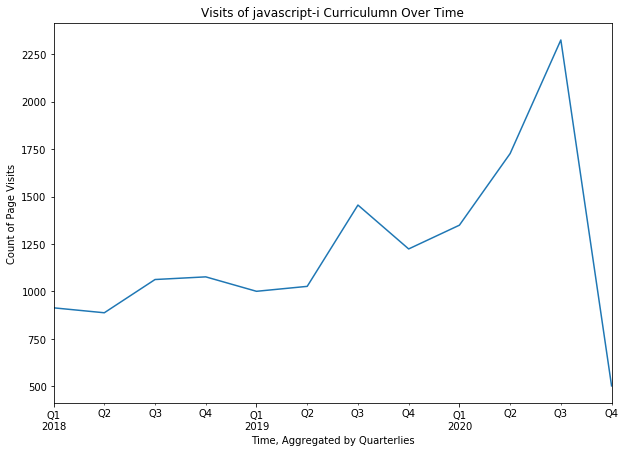

In [8]:
# plotting most popular page visits over time
plt.figure(figsize=(10,7))
WD_df[WD_df.page_viewed == 'javascript-i'].page_viewed.resample('Q').count().plot()
plt.title('Visits of javascript-i Curriculumn Over Time')
plt.xlabel('Time, Aggregated by Quarterlies')
plt.ylabel('Count of Page Visits')

In [9]:
# filtering out popular non-curriculumn pages
print('5 Most Popular Pages in Data Science Program')
DS_df.page_viewed.value_counts().head()

5 Most Popular Pages in Data Science Program


1-fundamentals/1.1-intro-to-data-science    1536
6-regression/1-overview                     1123
classification/overview                      860
10-anomaly-detection/1-overview              742
3-sql/1-mysql-overview                       704
Name: page_viewed, dtype: int64

Text(470, 410, 'Darden Begins')

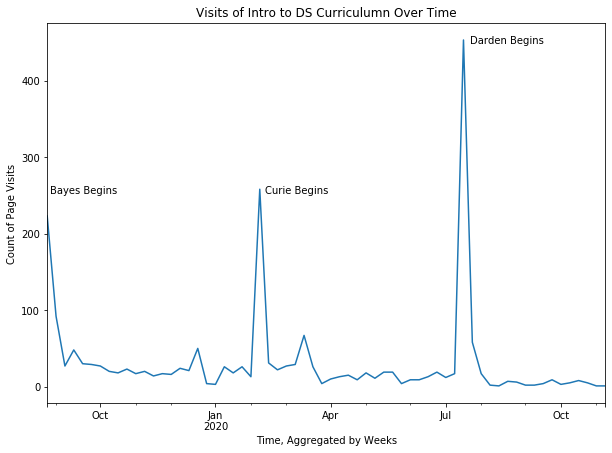

In [10]:
# plotting most popular page visits over time
plt.figure(figsize=(10,7))
WD_df[WD_df.page_viewed == '1-fundamentals/1.1-intro-to-data-science'].page_viewed.resample('W').count().plot()
plt.title('Visits of Intro to DS Curriculumn Over Time')
plt.xlabel('Time, Aggregated by Weeks')
plt.ylabel('Count of Page Visits')

plt.annotate('Bayes Begins',
            xy=(50, 260), xycoords='figure pixels')

plt.annotate('Curie Begins',
            xy=(265, 260), xycoords='figure pixels')

plt.annotate('Darden Begins',
            xy=(470, 410), xycoords='figure pixels')

Text(0, 0.5, 'Count of Page Visits')

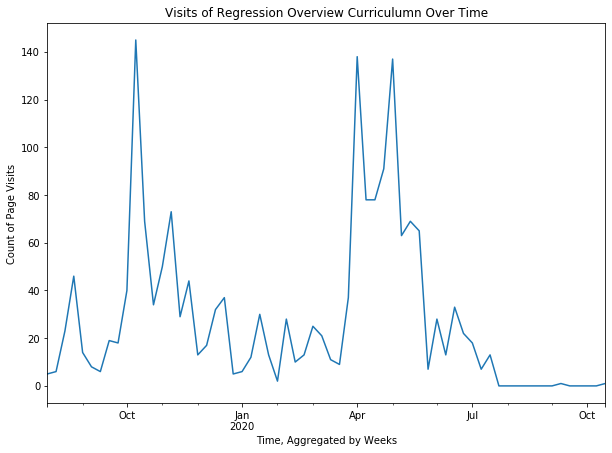

In [11]:
# plotting most popular page visits over time
plt.figure(figsize=(10,7))
WD_df[WD_df.page_viewed == '6-regression/1-overview'].page_viewed.resample('W').count().plot()
plt.title('Visits of Regression Overview Curriculumn Over Time')
plt.xlabel('Time, Aggregated by Weeks')
plt.ylabel('Count of Page Visits')

## Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? <a class="anchor" id="second-bullet"></a>

### Data Science Cohorts

In [12]:
pd.DataFrame(DS_df.page_viewed.value_counts().head(5)).index

Index(['1-fundamentals/1.1-intro-to-data-science', '6-regression/1-overview',
       'classification/overview', '10-anomaly-detection/1-overview',
       '3-sql/1-mysql-overview'],
      dtype='object')

In [13]:
popular_DS = DS_df[(DS_df.page_viewed == '1-fundamentals/1.1-intro-to-data-science') | (DS_df.page_viewed == '6-regression/1-overview') | (DS_df.page_viewed == 'classification/overview') | (DS_df.page_viewed == '10-anomaly-detection/1-overview') | (DS_df.page_viewed == '3-sql/1-mysql-overview')]

In [14]:
popular_DS = pd.crosstab(popular_DS.cohort_id, popular_DS.page_viewed)

In [15]:
popular_DS.columns = ['Fundamentals_Intro','Anomaly_Overview','MySQL_Overview','Regression_Overview','Classification_Overview']

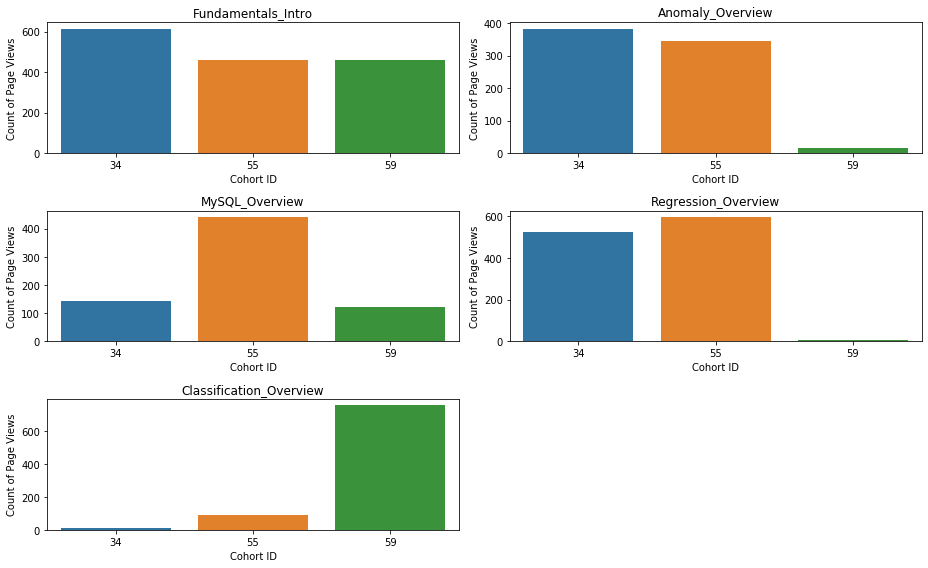

In [16]:
x = 1
plt.figure(figsize=(13,8))
for col in popular_DS.columns:
    plt.subplot(3,2,x)
    x = x + 1
    sns.barplot(x=popular_DS.index, y=popular_DS[col])
    plt.title(col)
    plt.xlabel("Cohort ID")
    plt.ylabel("Count of Page Views")
    
plt.tight_layout()

### Web Dev Cohorts

In [17]:
pd.DataFrame(WD_df.page_viewed.value_counts().head(5)).index

Index(['javascript-i', 'java-iii', 'html-css', 'java-ii', 'spring'], dtype='object')

In [18]:
popular_WD = WD_df[(WD_df.page_viewed == 'javascript-i') | (WD_df.page_viewed == 'java-iii') | (WD_df.page_viewed == 'html-css') | (WD_df.page_viewed == 'java-ii') | (WD_df.page_viewed == 'spring')]

In [19]:
popular_WD = pd.crosstab(popular_WD.cohort_id, popular_WD.page_viewed)

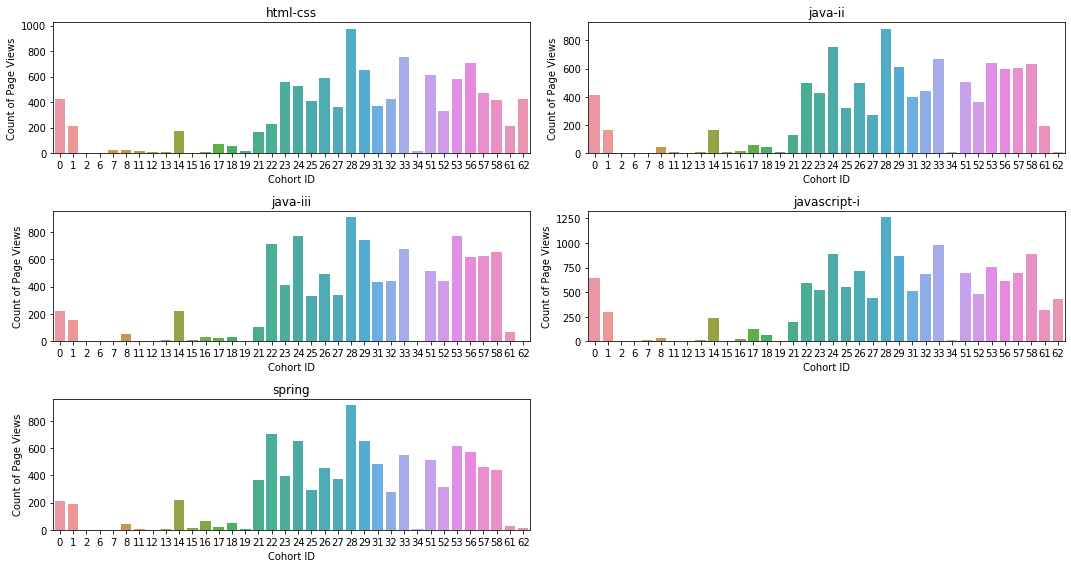

In [20]:
x = 1
plt.figure(figsize=(15,8))

for col in popular_WD.columns:
    plt.subplot(3,2,x)
    x = x + 1
    sns.barplot(x=popular_WD.index, y=popular_WD[col])
    plt.title(col)
    plt.xlabel("Cohort ID")
    plt.ylabel("Count of Page Views")
    
plt.tight_layout()

# Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? <a class="anchor" id="third-bullet"></a>
- active cohort id's == 58, 59, 60, 61

In [21]:
active_df = df[(df.cohort_id == 58) | (df.cohort_id == 59) | (df.cohort_id == 60) | (df.cohort_id == 61)]

In [22]:
active_df.groupby('user_id')['page_viewed'].count()

user_id
268     781
655    1107
656    2452
657    1304
658    1589
       ... 
780      52
781      94
783      54
784      93
785      31
Name: page_viewed, Length: 72, dtype: int64

# Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? <a class="anchor" id="fourth-bullet"></a>

Note: pages_viewed has a suspicous page "%20https://github.com/RaulCPena"

## At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? <a class="anchor" id="fifth-bullet"></a>

In [23]:
WD_users = list(WD_df.user_id.unique())

In [24]:
DS_users = list(DS_df.user_id.unique())

## What topics are grads continuing to reference after graduation and into their jobs (for each program)? <a class="anchor" id="sixth-bullet"></a>

## Which lessons are least accessed? <a class="anchor" id="seventh-bullet"></a>

In [25]:
page_counts = pd.DataFrame(WD_df.page_viewed.value_counts())

In [26]:
list(page_counts[page_counts.page_viewed == 1].index)

['html-css/grid/css-grid-fundamentals',
 'python/custom-sorting-functions',
 'java-iii/servelet',
 '12-distributed-ml/spark-topics',
 'Correlation.md',
 'j',
 '7-clustering/review',
 'html-css/css-i/positioning/specimen/MaterialIcons-Regular.ttf',
 'capsones/151',
 '4-stats/2.3-sampling',
 'relationships/indexes',
 'capstone/55',
 '3-vocabulary',
 '2.00.01_Navigating_Excel.md',
 '12-advanced-topics/3.3-building-a-model',
 'asdf',
 'python',
 ',%20https://github.com/RaulCPena',
 'extra-challenges/java-file-io-extras',
 'prep_311data_for_module',
 'ajax',
 'capstone/54',
 '3.5-evaluation.md',
 '5-stats/4.2-compare-means/null',
 '5.01_Prep',
 'elements/html',
 '5-stats/2.5-distributions-and-testing',
 'distributed-ml/read-jdbc',
 'javascript-i/math',
 '5-stats/2.1-probability_and_event_interactions',
 '6-regression/2-intro-to-regression',
 'content/examples/javascript/conditionals.html',
 'register%20t',
 '4-stats/1-descriptive-stats',
 '10-nlp/entity-labeling',
 'students/743/notes/1',
 

In [29]:
page_counts = pd.DataFrame(DS_df.page_viewed.value_counts())

In [30]:
list(page_counts[page_counts.page_viewed == 1].index)

['End_to_End_clustering',
 '10-anomaly-detection/3-discrete-probabilistic-methods.ipynb',
 '12-distributed-ml/3-getting-started',
 '7.4.1-pandas-overview',
 ',%20https://github.com/RaulCPena',
 '12-distributed-ml/6.2-prepare-part-2',
 '6-regression/8-Project',
 'end_to_end_clustering',
 '2-storytelling/1-overview/www.qlik.com',
 'imports',
 '%20https://github.com/RaulCPena',
 'curie-statistics-assessment',
 'regression/least-angle-regression',
 '12-distributed-ml/8.1-classification',
 'python/custom-sorting-functions',
 'index.html',
 '7.4.2-series',
 'A-clustering/project',
 'anomaly-detection/time-series-anomaly-detection-part-1',
 'b-clustering/project',
 'cli/4-navigating-the-filesystem',
 'classification/project-old-exec',
 'database-design',
 'grades',
 '2-storytelling/chart-types',
 '4-python/pandas-lesson',
 '5-stats/4.2-compare-means/null',
 '12-distributed-ml/4-acquire',
 'spring/extra-features/error-pages/asdfasdf',
 'regression/ridge-regression',
 'advanced-topics/html-form